In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle as w

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
df = w.clean_zillow()

df.head()

found data


,bedrooms,bathrooms,square_ft,tax_value,year,tax_amount,county
3,0,0.0,1535,2108,1953,174.21,Los Angeles
4,4,2.0,3633,296425,2005,6941.39,Los Angeles
6,3,4.0,1620,847770,2011,10244.94,Los Angeles
7,3,2.0,2077,646760,1926,7924.68,Los Angeles
8,0,0.0,1535,6730242,1953,80348.13,Los Angeles


In [3]:
def split_data(df):

    seed = 42

    train, val_test = train_test_split(df, train_size = .7,
                                        random_state = seed)

    val, test = train_test_split(val_test, train_size = .5,
                                random_state = seed)

    return train, val, test

In [4]:
train, val, test = split_data(df)

train.shape, val.shape, test.shape

((1503871, 7), (322258, 7), (322259, 7))

In [5]:
def compare_data(scaled_col, feature, df = train):
    
    plt.figure(figsize = (11, 7))

    plt.subplot(1,2,1)

    sns.histplot(data = df, x = df[feature], bins = 10)

    
    plt.subplot(1,2,2)

    sns.histplot(data = df, x = df[scaled_col], bins = 10)

    plt.show()

## MinMaxScaler

In [6]:
mms = MinMaxScaler()

mms.fit(train[['bedrooms','bathrooms','square_ft','tax_value','year','tax_amount']])

train[['bedrooms_mms','bathrooms_mms','square_ft_mms','tax_value_mms','year_mms','tax_amount_mms']] = mms.transform(train[['bedrooms','bathrooms','square_ft','tax_value','year','tax_amount']])

train.head()

,bedrooms,bathrooms,square_ft,tax_value,year,tax_amount,county,bedrooms_mms,bathrooms_mms,square_ft_mms,tax_value_mms,year_mms,tax_amount_mms
1911171,2,1.0,1180,288951,1946,3521.04,Los Angeles,0.08,0.031250,0.001238,0.002935,0.674419,0.002631
818602,4,3.0,2594,266330,1973,2845.16,Ventura,0.16,0.093750,0.002722,0.002706,0.800000,0.002125
1795717,4,2.5,2454,325747,2009,3724.72,Orange,0.16,0.078125,0.002575,0.003309,0.967442,0.002783
1973528,4,1.0,1700,40740,1911,1047.53,Los Angeles,0.16,0.031250,0.001784,0.000414,0.511628,0.000782
1139959,4,2.5,2598,369055,1964,4452.26,Orange,0.16,0.078125,0.002726,0.003749,0.758140,0.003327


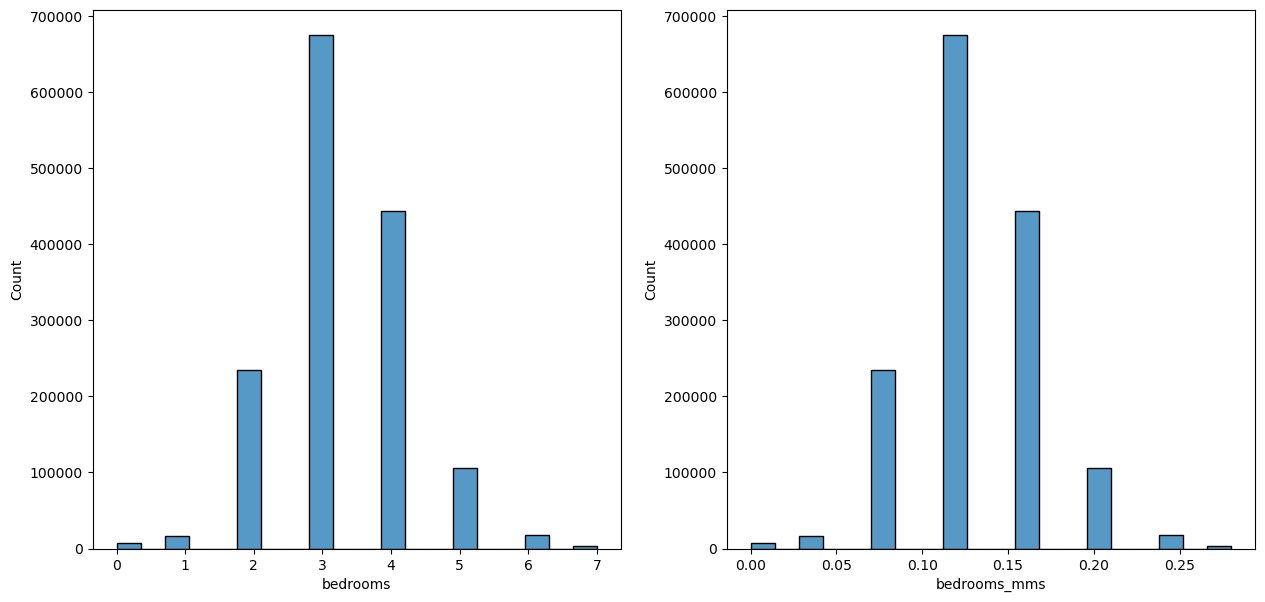

In [7]:
plt.figure(figsize = (15, 7))

plt.subplot(1,2,1)

sns.histplot(data = train, x = train.bedrooms[train['bedrooms'] <= 7], bins = 20)


plt.subplot(1,2,2)

sns.histplot(data = train, x = train.bedrooms_mms[train['bedrooms_mms'] <= .28], bins = 20)

plt.show()

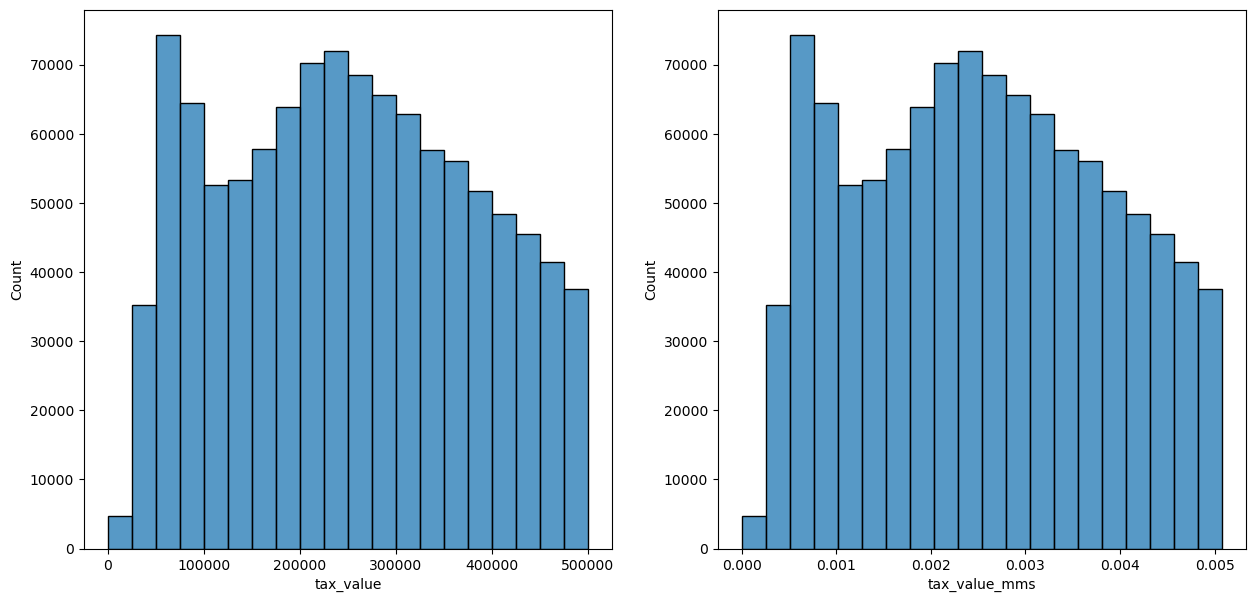

In [8]:
plt.figure(figsize = (15, 7))

plt.subplot(1,2,1)

sns.histplot(data = train, x = train.tax_value[train.tax_value <= 500000], bins = 20)


plt.subplot(1,2,2)

sns.histplot(data = train, x = train.tax_value_mms[train.tax_value <= 500000], bins = 20)

plt.show()

## Standard Scaling

In [9]:
ss = StandardScaler()

ss.fit(train[['bedrooms','bathrooms','square_ft','tax_value','year','tax_amount']])

train[['bedrooms_ss','bathrooms_ss','square_ft_ss','tax_value_ss','year_ss','tax_amount_ss']] = ss.transform(train[['bedrooms','bathrooms','square_ft','tax_value','year','tax_amount']])

train.head()

,bedrooms,bathrooms,square_ft,tax_value,year,tax_amount,county,bedrooms_mms,bathrooms_mms,square_ft_mms,tax_value_mms,year_mms,tax_amount_mms,bedrooms_ss,bathrooms_ss,square_ft_ss,tax_value_ss,year_ss,tax_amount_ss
1911171,2,1.0,1180,288951,1946,3521.04,Los Angeles,0.08,0.031250,0.001238,0.002935,0.674419,0.002631,-1.358027,-1.235825,-0.519570,-0.247101,-0.677116,-0.257532
818602,4,3.0,2594,266330,1973,2845.16,Ventura,0.16,0.093750,0.002722,0.002706,0.800000,0.002125,0.746660,0.769433,0.555921,-0.279428,0.543306,-0.339955
1795717,4,2.5,2454,325747,2009,3724.72,Orange,0.16,0.078125,0.002575,0.003309,0.967442,0.002783,0.746660,0.268119,0.449436,-0.194517,2.170537,-0.232693
1973528,4,1.0,1700,40740,1911,1047.53,Los Angeles,0.16,0.031250,0.001784,0.000414,0.511628,0.000782,0.746660,-1.235825,-0.124057,-0.601812,-2.259145,-0.559174
1139959,4,2.5,2598,369055,1964,4452.26,Orange,0.16,0.078125,0.002726,0.003749,0.758140,0.003327,0.746660,0.268119,0.558963,-0.132627,0.136499,-0.143971


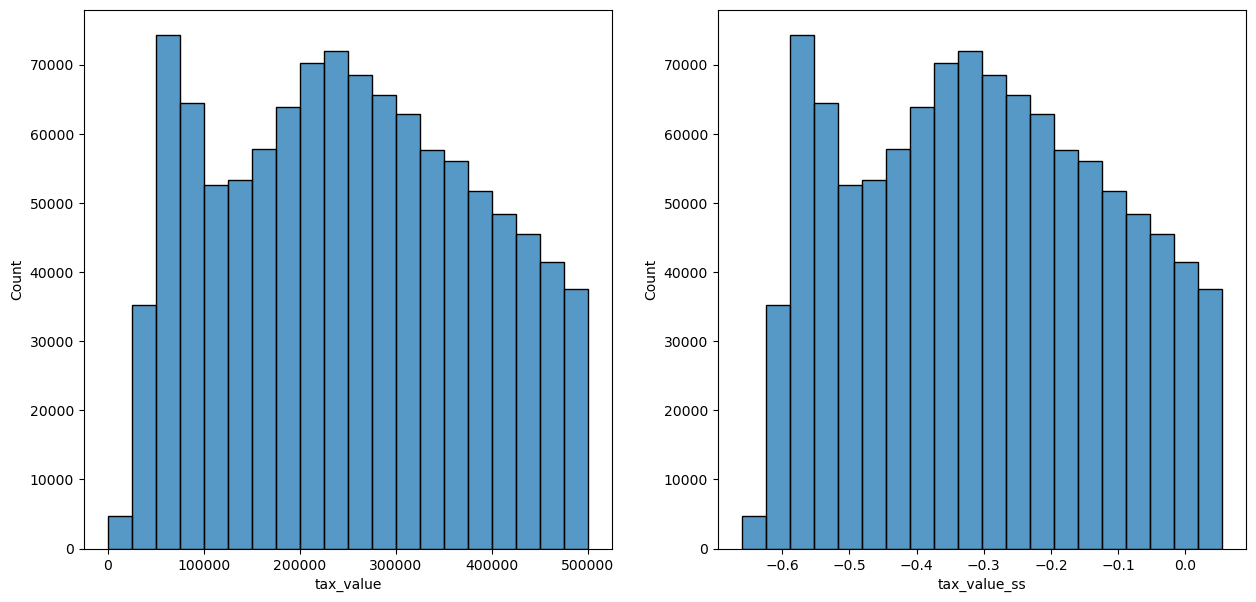

In [10]:
plt.figure(figsize = (15, 7))

plt.subplot(1,2,1)

sns.histplot(data = train, x = train.tax_value[train.tax_value <= 500000], bins = 20)


plt.subplot(1,2,2)

sns.histplot(data = train, x = train.tax_value_ss[train.tax_value <= 500000], bins = 20)

plt.show()

## Robust Scaling

In [11]:
rs = RobustScaler()

rs.fit(train[['bedrooms','bathrooms','square_ft','tax_value','year','tax_amount']])

train[['bedrooms_rs','bathrooms_rs','square_ft_rs','tax_value_rs','year_rs','tax_amount_rs']] = rs.transform(train[['bedrooms','bathrooms','square_ft','tax_value','year','tax_amount']])

train.head()

,bedrooms,bathrooms,square_ft,tax_value,year,tax_amount,county,bedrooms_mms,bathrooms_mms,square_ft_mms,...,square_ft_ss,tax_value_ss,year_ss,tax_amount_ss,bedrooms_rs,bathrooms_rs,square_ft_rs,tax_value_rs,year_rs,tax_amount_rs
1911171,2,1.0,1180,288951,1946,3521.04,Los Angeles,0.08,0.031250,0.001238,...,-0.519570,-0.247101,-0.677116,-0.257532,-1.0,-1.0,-0.468354,-0.112510,-0.461538,-0.151496
818602,4,3.0,2594,266330,1973,2845.16,Ventura,0.16,0.093750,0.002722,...,0.555921,-0.279428,0.543306,-0.339955,1.0,1.0,1.023207,-0.177877,0.576923,-0.325782
1795717,4,2.5,2454,325747,2009,3724.72,Orange,0.16,0.078125,0.002575,...,0.449436,-0.194517,2.170537,-0.232693,1.0,0.5,0.875527,-0.006181,1.961538,-0.098974
1973528,4,1.0,1700,40740,1911,1047.53,Los Angeles,0.16,0.031250,0.001784,...,-0.124057,-0.601812,-2.259145,-0.559174,1.0,-1.0,0.080169,-0.829760,-1.807692,-0.789328
1139959,4,2.5,2598,369055,1964,4452.26,Orange,0.16,0.078125,0.002726,...,0.558963,-0.132627,0.136499,-0.143971,1.0,0.5,1.027426,0.118965,0.230769,0.088633


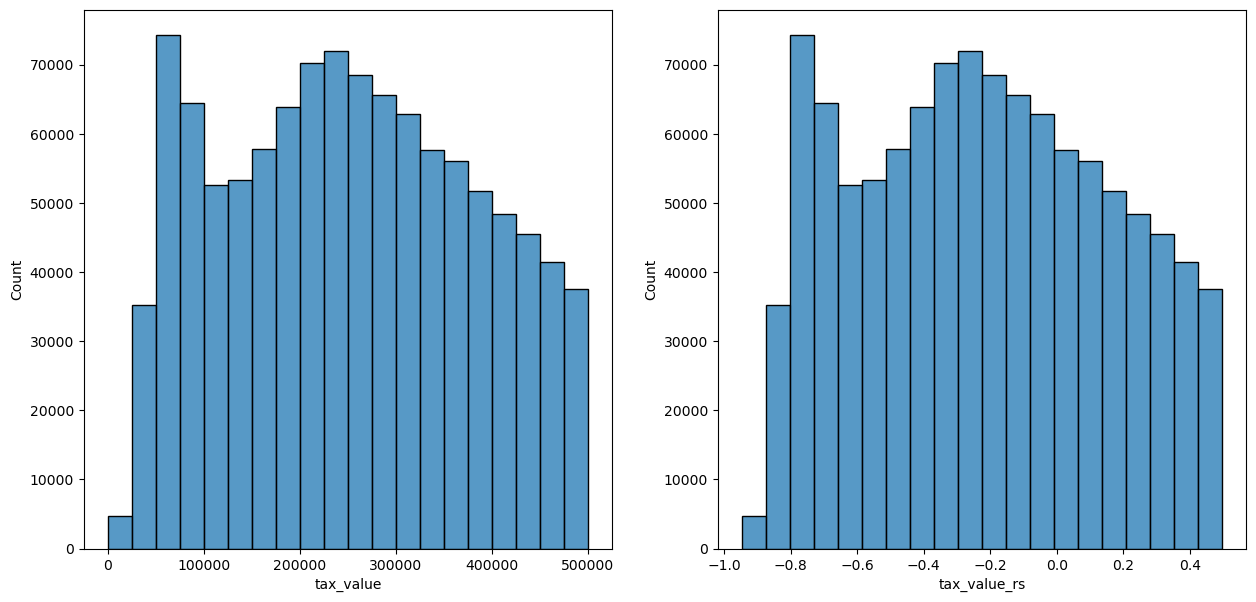

In [12]:
plt.figure(figsize = (15, 7))

plt.subplot(1,2,1)

sns.histplot(data = train, x = train.tax_value[train.tax_value <= 500000], bins = 20)


plt.subplot(1,2,2)

sns.histplot(data = train, x = train.tax_value_rs[train.tax_value <= 500000], bins = 20)

plt.show()